# load the dataset

In [5]:
from polars import DataFrame

Let's load the dataset to analyze

In [6]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from scipy.io import arff

arff_data = arff.loadarff("/content/drive/MyDrive/Colab Notebooks/data.arff")
df = DataFrame(arff_data[0])
raw_data = DataFrame(arff_data[0])

# explore the dataset

In [8]:
import polars as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from polars import DataFrame
from scipy.stats import pearsonr

Start by cleaning up, making everything lower case & converting data types

In [9]:
df.columns = [col.lower() for col in df.columns]
df.replace_column(df.get_column_index("class"), df.get_column("class").cast(pd.String))

print(df.head())
print(df.shape)

shape: (5, 31)
┌──────┬───────────┬───────────┬──────────┬───┬───────────┬───────────┬────────┬───────┐
│ time ┆ v1        ┆ v2        ┆ v3       ┆ … ┆ v27       ┆ v28       ┆ amount ┆ class │
│ ---  ┆ ---       ┆ ---       ┆ ---      ┆   ┆ ---       ┆ ---       ┆ ---    ┆ ---   │
│ f64  ┆ f64       ┆ f64       ┆ f64      ┆   ┆ f64       ┆ f64       ┆ f64    ┆ str   │
╞══════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪═══════════╪════════╪═══════╡
│ 0.0  ┆ -1.359807 ┆ -0.072781 ┆ 2.536347 ┆ … ┆ 0.133558  ┆ -0.021053 ┆ 149.62 ┆ 0     │
│ 0.0  ┆ 1.191857  ┆ 0.266151  ┆ 0.16648  ┆ … ┆ -0.008983 ┆ 0.014724  ┆ 2.69   ┆ 0     │
│ 1.0  ┆ -1.358354 ┆ -1.340163 ┆ 1.773209 ┆ … ┆ -0.055353 ┆ -0.059752 ┆ 378.66 ┆ 0     │
│ 1.0  ┆ -0.966272 ┆ -0.185226 ┆ 1.792993 ┆ … ┆ 0.062723  ┆ 0.061458  ┆ 123.5  ┆ 0     │
│ 2.0  ┆ -1.158233 ┆ 0.877737  ┆ 1.548718 ┆ … ┆ 0.219422  ┆ 0.215153  ┆ 69.99  ┆ 0     │
└──────┴───────────┴───────────┴──────────┴───┴───────────┴───────────┴────────┴───────┘
(28480

Non-null count for all columns

In [10]:
print((df.null_count() * -1) + pd.Series("", [df.shape[0]]))

shape: (1, 31)
┌────────┬────────┬────────┬────────┬───┬────────┬────────┬────────┬────────┐
│ time   ┆ v1     ┆ v2     ┆ v3     ┆ … ┆ v27    ┆ v28    ┆ amount ┆ class  │
│ ---    ┆ ---    ┆ ---    ┆ ---    ┆   ┆ ---    ┆ ---    ┆ ---    ┆ ---    │
│ i64    ┆ i64    ┆ i64    ┆ i64    ┆   ┆ i64    ┆ i64    ┆ i64    ┆ i64    │
╞════════╪════════╪════════╪════════╪═══╪════════╪════════╪════════╪════════╡
│ 284807 ┆ 284807 ┆ 284807 ┆ 284807 ┆ … ┆ 284807 ┆ 284807 ┆ 284807 ┆ 284807 │
└────────┴────────┴────────┴────────┴───┴────────┴────────┴────────┴────────┘


Null count for all columns

In [11]:
print(df.null_count())

shape: (1, 31)
┌──────┬─────┬─────┬─────┬───┬─────┬─────┬────────┬───────┐
│ time ┆ v1  ┆ v2  ┆ v3  ┆ … ┆ v27 ┆ v28 ┆ amount ┆ class │
│ ---  ┆ --- ┆ --- ┆ --- ┆   ┆ --- ┆ --- ┆ ---    ┆ ---   │
│ u32  ┆ u32 ┆ u32 ┆ u32 ┆   ┆ u32 ┆ u32 ┆ u32    ┆ u32   │
╞══════╪═════╪═════╪═════╪═══╪═════╪═════╪════════╪═══════╡
│ 0    ┆ 0   ┆ 0   ┆ 0   ┆ … ┆ 0   ┆ 0   ┆ 0      ┆ 0     │
└──────┴─────┴─────┴─────┴───┴─────┴─────┴────────┴───────┘


Percentage of unique values

In [12]:
print(df["class"].value_counts(normalize=True))

shape: (2, 2)
┌───────┬────────────┐
│ class ┆ proportion │
│ ---   ┆ ---        │
│ str   ┆ f64        │
╞═══════╪════════════╡
│ 1     ┆ 0.001727   │
│ 0     ┆ 0.998273   │
└───────┴────────────┘


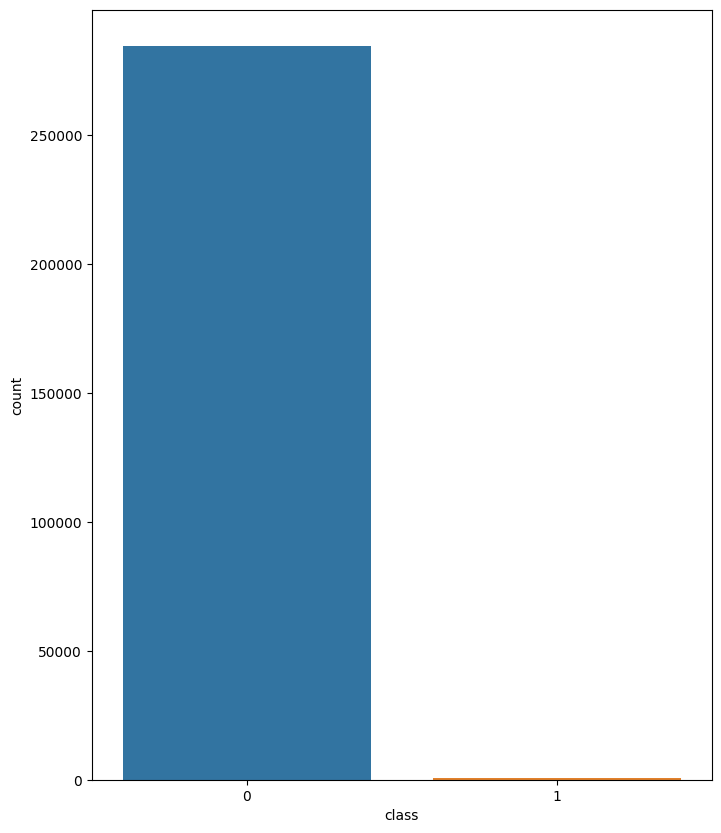

In [13]:
# Plot
f, ax = plt.subplots(figsize=(8, 10))
_ax = sns.countplot(x="class", data=df, hue="class", legend=False)

Describe time and amount values

In [14]:
print(df[["time", "amount"]].describe())

shape: (9, 3)
┌────────────┬──────────────┬────────────┐
│ statistic  ┆ time         ┆ amount     │
│ ---        ┆ ---          ┆ ---        │
│ str        ┆ f64          ┆ f64        │
╞════════════╪══════════════╪════════════╡
│ count      ┆ 284807.0     ┆ 284807.0   │
│ null_count ┆ 0.0          ┆ 0.0        │
│ mean       ┆ 94813.859575 ┆ 88.349619  │
│ std        ┆ 47488.145955 ┆ 250.120109 │
│ min        ┆ 0.0          ┆ 0.0        │
│ 25%        ┆ 54202.0      ┆ 5.6        │
│ 50%        ┆ 84692.0      ┆ 22.0       │
│ 75%        ┆ 139321.0     ┆ 77.17      │
│ max        ┆ 172792.0     ┆ 25691.16   │
└────────────┴──────────────┴────────────┘


On average, each transaction happens every time:mean seconds

This two columns have outliers. It can be seen from the difference w max value

In [15]:
# Get data about fraud transaction vs normal transactions (count, columns)
fraud = df.filter(pd.col("class") == "1")
normal = df.filter(pd.col("class") == "0")
print(f"Shape of Fraud Transactions: {fraud.shape}")
print(f"Shape of Normal Transactions: {normal.shape}")

Shape of Fraud Transactions: (492, 31)
Shape of Normal Transactions: (284315, 31)


Compare side by side the fraud and normal amounts

In [16]:
n = normal["amount"].describe()
# Combine horizontally
print(
    pd.concat(
        [
            n.select("statistic"),
            fraud["amount"]
            .describe()
            .select("value")
            .rename({"value": "fraud_amount"}),
            n.select("value").rename({"value": "normal_amount"}),
        ],
        how="horizontal",
    )
)

shape: (9, 3)
┌────────────┬──────────────┬───────────────┐
│ statistic  ┆ fraud_amount ┆ normal_amount │
│ ---        ┆ ---          ┆ ---           │
│ str        ┆ f64          ┆ f64           │
╞════════════╪══════════════╪═══════════════╡
│ count      ┆ 492.0        ┆ 284315.0      │
│ null_count ┆ 0.0          ┆ 0.0           │
│ mean       ┆ 122.211321   ┆ 88.291022     │
│ std        ┆ 256.683288   ┆ 250.105092    │
│ min        ┆ 0.0          ┆ 0.0           │
│ 25%        ┆ 1.0          ┆ 5.65          │
│ 50%        ┆ 9.29         ┆ 22.0          │
│ 75%        ┆ 105.89       ┆ 77.05         │
│ max        ┆ 2125.87      ┆ 25691.16      │
└────────────┴──────────────┴───────────────┘


In [17]:
print(fraud["amount"].value_counts(sort=True).head())

shape: (5, 2)
┌────────┬───────┐
│ amount ┆ count │
│ ---    ┆ ---   │
│ f64    ┆ u32   │
╞════════╪═══════╡
│ 1.0    ┆ 113   │
│ 0.0    ┆ 27    │
│ 99.99  ┆ 27    │
│ 0.76   ┆ 17    │
│ 0.77   ┆ 10    │
└────────┴───────┘


Check the monetary amount involved in frauds

With fraud transactions, the average amount of fraud is 122.22 USD, the highest is 2125 USD, the lowest is 0 and the maximum amount is 1 USD with 113 times.

<Axes: title={'center': 'Distribution of Transaction Time'}, ylabel='Count'>

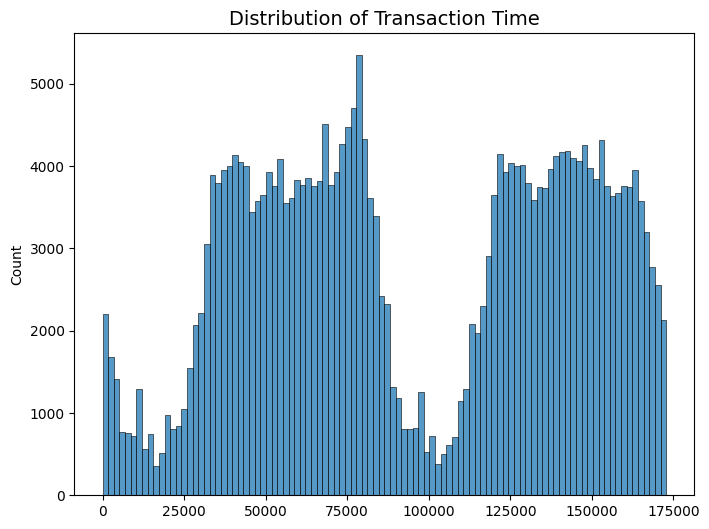

In [18]:
plt.figure(figsize=(8, 6))
plt.title("Distribution of Transaction Time", fontsize=14)
sns.histplot(df["time"], bins=100)

This data set contains two-day trading information, looking at the distribution chart we see two peaks and two troughs. Most likely, the two peaks are transactions during the day because of the high volume of transactions, and the two bottoms are transactions at night when everyone is asleep.

Text(0.5, 1.0, 'Distribution of Genuine Transactions')

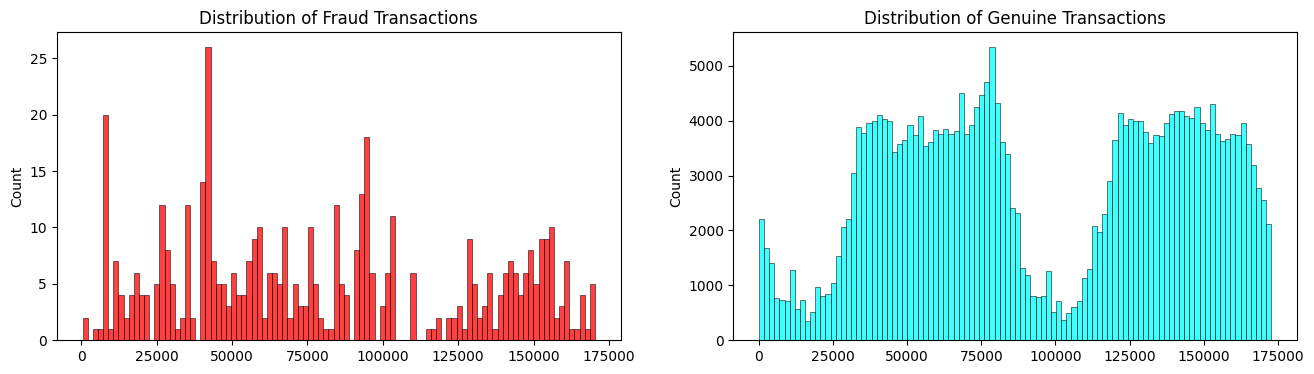

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
axs[0].set_title("Distribution of Fraud Transactions")
sns.histplot(fraud["time"], bins=100, color="red", ax=axs[0])

sns.histplot(normal["time"], bins=100, color="cyan", ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

Text(0.5, 1.0, 'Distribution of Normal Transactions')

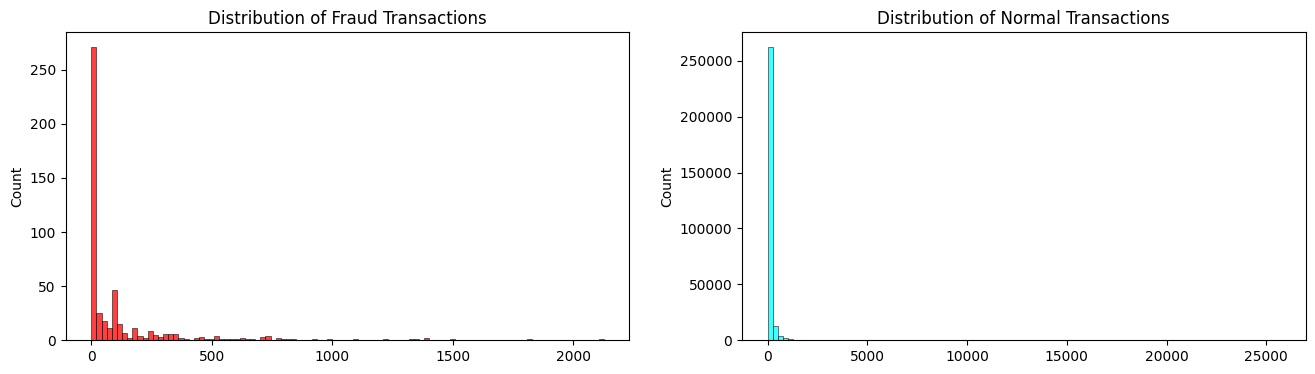

In [20]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
sns.histplot(fraud["amount"], bins=100, color="red", ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.histplot(normal["amount"], bins=100, color="cyan", ax=axs[1])
axs[1].set_title("Distribution of Normal Transactions")

Log transforms are useful when applied to skewed distributions because they tend to expand values in the lower magnitude range and tend to compress or reduce values in the magnitude range.

In [21]:
df.insert_column(-1, pd.Series("amount_log", np.log(df["amount"] + 0.0001)))

print(df.head())
# Convert everything to float, otherwise we get errors with string - float operations
_tmp = df.get_column("class").cast(pd.Float64)
df = df.drop("class")
df.insert_column(-1, _tmp)

shape: (5, 32)
┌──────┬───────────┬───────────┬──────────┬───┬───────────┬────────┬────────────┬───────┐
│ time ┆ v1        ┆ v2        ┆ v3       ┆ … ┆ v28       ┆ amount ┆ amount_log ┆ class │
│ ---  ┆ ---       ┆ ---       ┆ ---      ┆   ┆ ---       ┆ ---    ┆ ---        ┆ ---   │
│ f64  ┆ f64       ┆ f64       ┆ f64      ┆   ┆ f64       ┆ f64    ┆ f64        ┆ str   │
╞══════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪════════╪════════════╪═══════╡
│ 0.0  ┆ -1.359807 ┆ -0.072781 ┆ 2.536347 ┆ … ┆ -0.021053 ┆ 149.62 ┆ 5.008099   ┆ 0     │
│ 0.0  ┆ 1.191857  ┆ 0.266151  ┆ 0.16648  ┆ … ┆ 0.014724  ┆ 2.69   ┆ 0.989578   ┆ 0     │
│ 1.0  ┆ -1.358354 ┆ -1.340163 ┆ 1.773209 ┆ … ┆ -0.059752 ┆ 378.66 ┆ 5.936639   ┆ 0     │
│ 1.0  ┆ -0.966272 ┆ -0.185226 ┆ 1.792993 ┆ … ┆ 0.061458  ┆ 123.5  ┆ 4.816242   ┆ 0     │
│ 2.0  ┆ -1.158233 ┆ 0.877737  ┆ 1.548718 ┆ … ┆ 0.215153  ┆ 69.99  ┆ 4.248354   ┆ 0     │
└──────┴───────────┴───────────┴──────────┴───┴───────────┴────────┴────────────┴────

shape: (284_807, 32)
┌──────────┬────────────┬───────────┬───────────┬───┬───────────┬────────┬───────┬────────────┐
│ time     ┆ v1         ┆ v2        ┆ v3        ┆ … ┆ v28       ┆ amount ┆ class ┆ amount_log │
│ ---      ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---    ┆ ---   ┆ ---        │
│ f64      ┆ f64        ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64    ┆ f64   ┆ f64        │
╞══════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪════════╪═══════╪════════════╡
│ 0.0      ┆ -1.359807  ┆ -0.072781 ┆ 2.536347  ┆ … ┆ -0.021053 ┆ 149.62 ┆ 0.0   ┆ 5.008099   │
│ 0.0      ┆ 1.191857   ┆ 0.266151  ┆ 0.16648   ┆ … ┆ 0.014724  ┆ 2.69   ┆ 0.0   ┆ 0.989578   │
│ 1.0      ┆ -1.358354  ┆ -1.340163 ┆ 1.773209  ┆ … ┆ -0.059752 ┆ 378.66 ┆ 0.0   ┆ 5.936639   │
│ 1.0      ┆ -0.966272  ┆ -0.185226 ┆ 1.792993  ┆ … ┆ 0.061458  ┆ 123.5  ┆ 0.0   ┆ 4.816242   │
│ 2.0      ┆ -1.158233  ┆ 0.877737  ┆ 1.548718  ┆ … ┆ 0.215153  ┆ 69.99  ┆ 0.0   ┆ 4.248354   │
│ …        ┆ …          ┆ …         ┆ …         ┆ … ┆ …         ┆ …      ┆ …     ┆ …          │
│ 172786.0 ┆ -11.881118 ┆ 10.071785 ┆ -9.834783 ┆ … ┆ 0.823731  ┆ 0.77   ┆ 0.0   ┆ -0.261235  │
│ 172787.0 ┆ -0.732789  ┆ -0.05508  ┆ 2.03503   ┆ … ┆ -0.053527 ┆ 24.79  ┆ 0.0   ┆ 3.210444   │
│ 172788.0 ┆ 1.919565   ┆ -0.301254 ┆ -3.24964  ┆ … ┆ -0.026561 ┆ 67.88  ┆ 0.0   ┆ 4.217743   │
│ 172788.0 ┆ -0.24044   ┆ 0.530483  ┆ 0.70251   ┆ … ┆ 0.104533  ┆ 10.0   ┆ 0.0   ┆ 2.302595   │
│ 172792.0 ┆ -0.533413  ┆ -0.189733 ┆ 0.703337  ┆ … ┆ 0.013649  ┆ 217.0  ┆ 0.0   ┆ 5.379898   │
└──────────┴────────────┴───────────┴───────────┴───┴───────────┴────────┴───────┴────────────┘

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


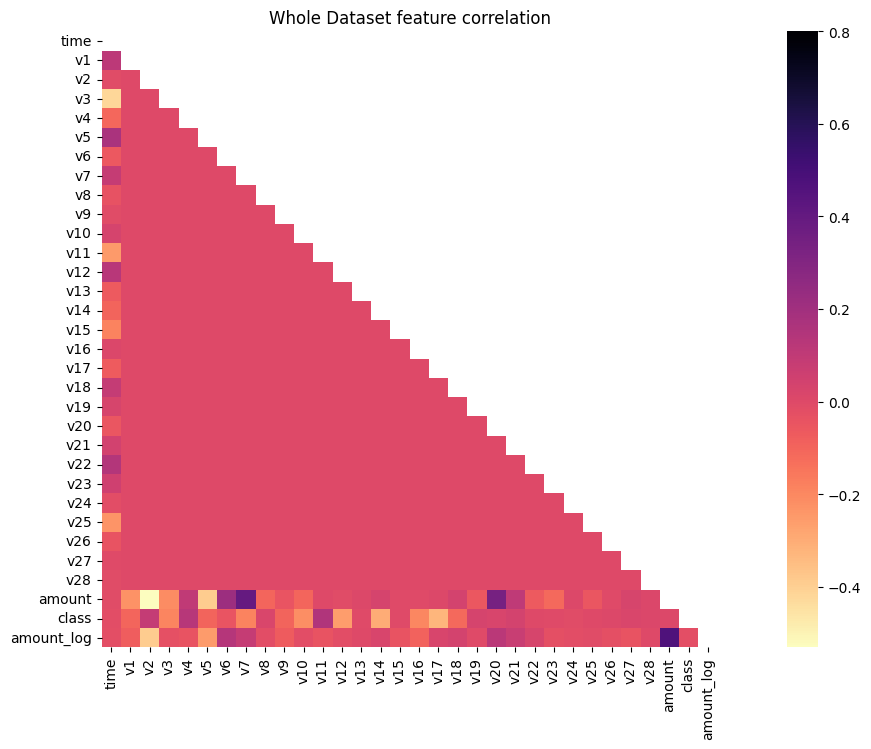

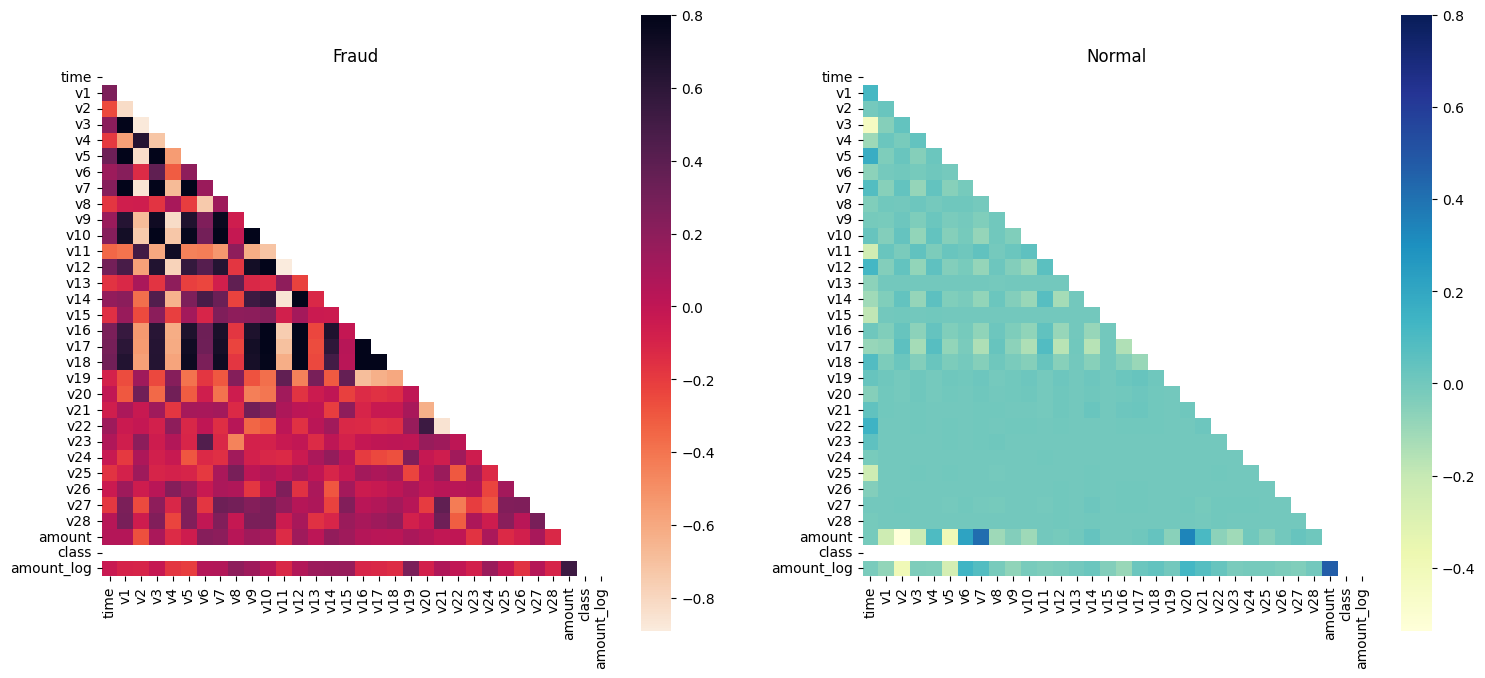

In [22]:
# Feature correlation study
corr = df.corr().to_pandas()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, (ax1) = plt.subplots(1, 1, figsize=(18, 8))
sns.heatmap(
    df.corr().to_pandas(), vmax=0.8, square=True, ax=ax1, cmap="magma_r", mask=mask
)
ax1.set_title("Whole Dataset feature correlation")
ax1.set_yticklabels(df.columns, rotation=0)

# Prepare plot in which we'll put two correlation matrix (fraud and normal)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Get data about fraud transaction vs normal transactions (count, columns)
fraud = df.filter(pd.col("class") == 1)
normal = df.filter(pd.col("class") == 0)

# mask used to remove useless (mirrored) data.
sns.heatmap(
    fraud.corr().to_pandas(),
    vmax=0.8,
    square=True,
    ax=ax1,
    cmap="rocket_r",
    mask=mask,
)
ax1.set_title("Fraud")
ax1.set_yticklabels(df.columns, rotation=0)
sns.heatmap(
    normal.corr().to_pandas(),
    vmax=0.8,
    square=True,
    ax=ax2,
    cmap="YlGnBu",
    mask=mask,
)
ax2.set_title("Normal")
ax2.set_yticklabels(df.columns, rotation=0)
plt.show()

In [23]:
from typing import Tuple


def plot_feature_corr_scatter(df: DataFrame, features: Tuple[str, str]):
    first_key, second_key = features
    s = sns.lmplot(
        x=first_key,
        y=second_key,
        data=df,
        hue="class",
        fit_reg=True,
        scatter_kws={"s": 2},
    )
    r, _ = pearsonr(df.get_column(first_key), df.get_column(second_key))
    plt.text(
        0.95,
        0.85,
        f"r = {r:.2f}",
        ha="right",
        va="center",
        transform=s.ax.transAxes,
    )
    plt.show()

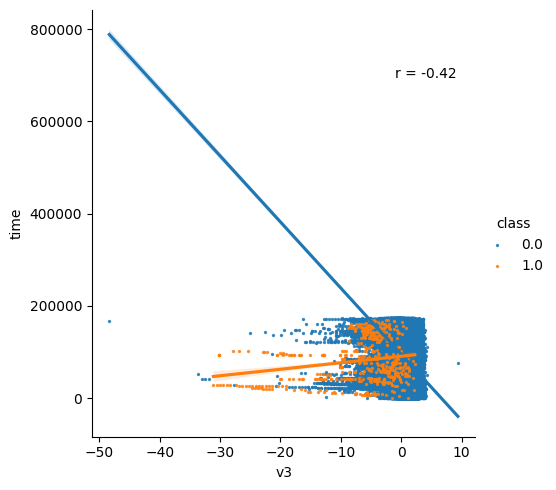

In [24]:
# Time inverse correlation
plot_feature_corr_scatter(df, ("v3", "time"))

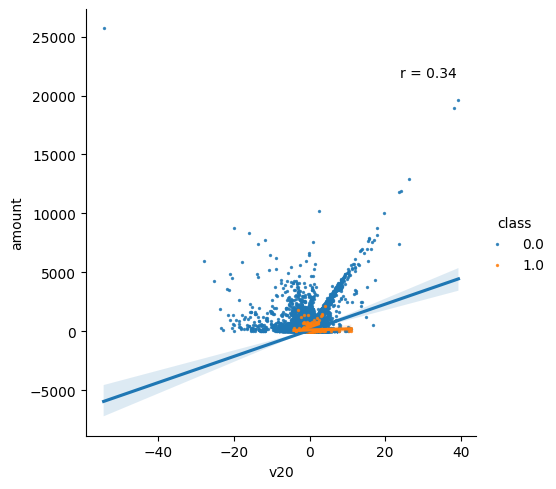

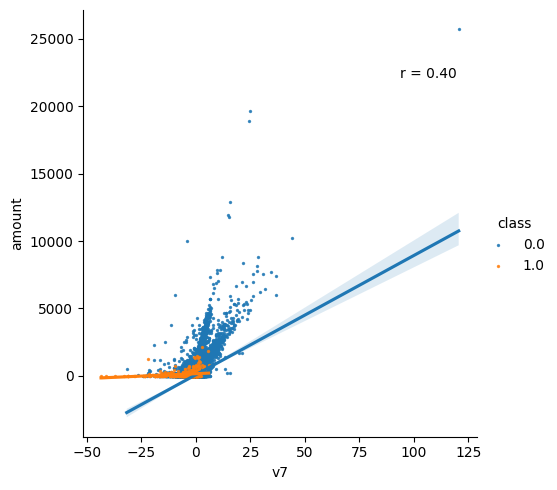

In [25]:
# Amount correlation

# Direct correlation
plot_feature_corr_scatter(df, ("v20", "amount"))
plot_feature_corr_scatter(df, ("v7", "amount"))

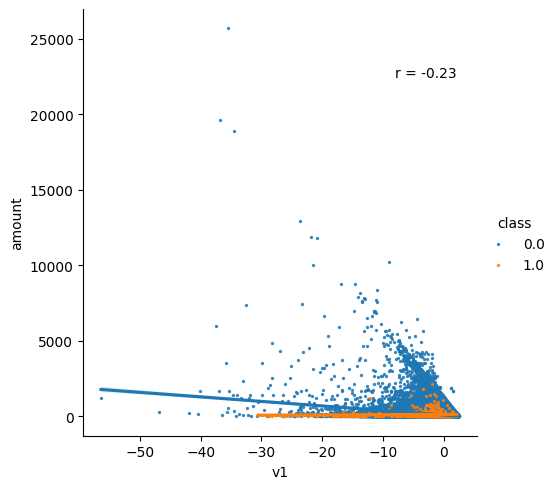

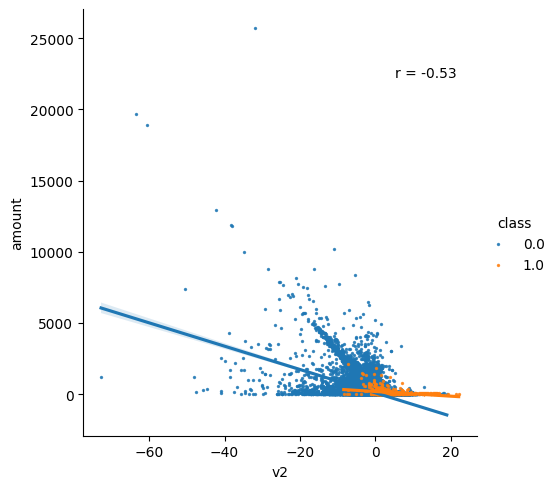

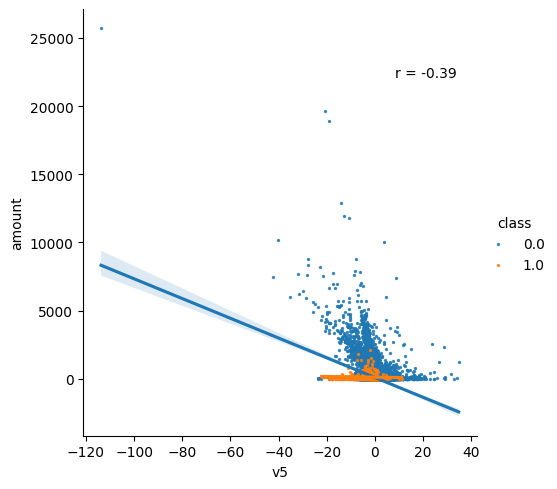

In [26]:
# Inverse correlation
plot_feature_corr_scatter(df, ("v1", "amount"))
plot_feature_corr_scatter(df, ("v2", "amount"))
plot_feature_corr_scatter(df, ("v5", "amount"))

# prepare the dataset

In [27]:
# Start by cleaning up, making everything lower case & converting data types
raw_data.columns = [col.lower() for col in raw_data.columns]
raw_data.replace_column(
    raw_data.get_column_index("class"), raw_data.get_column("class").cast(pd.String)
)
# Scale amount by log
raw_data.insert_column(-1, pd.Series("amount_log", np.log(raw_data["amount"] + 0.0001)))
# Convert everything to float, otherwise we get errors with string - float operations
raw_data.replace_column(
    raw_data.get_column_index("class"), raw_data.get_column("class").cast(pd.Float64)
)

shape: (284_807, 32)
┌──────────┬────────────┬───────────┬───────────┬───┬───────────┬────────┬────────────┬───────┐
│ time     ┆ v1         ┆ v2        ┆ v3        ┆ … ┆ v28       ┆ amount ┆ amount_log ┆ class │
│ ---      ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---    ┆ ---        ┆ ---   │
│ f64      ┆ f64        ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64    ┆ f64        ┆ f64   │
╞══════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪════════╪════════════╪═══════╡
│ 0.0      ┆ -1.359807  ┆ -0.072781 ┆ 2.536347  ┆ … ┆ -0.021053 ┆ 149.62 ┆ 5.008099   ┆ 0.0   │
│ 0.0      ┆ 1.191857   ┆ 0.266151  ┆ 0.16648   ┆ … ┆ 0.014724  ┆ 2.69   ┆ 0.989578   ┆ 0.0   │
│ 1.0      ┆ -1.358354  ┆ -1.340163 ┆ 1.773209  ┆ … ┆ -0.059752 ┆ 378.66 ┆ 5.936639   ┆ 0.0   │
│ 1.0      ┆ -0.966272  ┆ -0.185226 ┆ 1.792993  ┆ … ┆ 0.061458  ┆ 123.5  ┆ 4.816242   ┆ 0.0   │
│ 2.0      ┆ -1.158233  ┆ 0.877737  ┆ 1.548718  ┆ … ┆ 0.215153  ┆ 69.99  ┆ 4.248354   ┆ 0.0   │
│ …        ┆ …          ┆ …         ┆ …         ┆ … ┆ …         ┆ …      ┆ …          ┆ …     │
│ 172786.0 ┆ -11.881118 ┆ 10.071785 ┆ -9.834783 ┆ … ┆ 0.823731  ┆ 0.77   ┆ -0.261235  ┆ 0.0   │
│ 172787.0 ┆ -0.732789  ┆ -0.05508  ┆ 2.03503   ┆ … ┆ -0.053527 ┆ 24.79  ┆ 3.210444   ┆ 0.0   │
│ 172788.0 ┆ 1.919565   ┆ -0.301254 ┆ -3.24964  ┆ … ┆ -0.026561 ┆ 67.88  ┆ 4.217743   ┆ 0.0   │
│ 172788.0 ┆ -0.24044   ┆ 0.530483  ┆ 0.70251   ┆ … ┆ 0.104533  ┆ 10.0   ┆ 2.302595   ┆ 0.0   │
│ 172792.0 ┆ -0.533413  ┆ -0.189733 ┆ 0.703337  ┆ … ┆ 0.013649  ┆ 217.0  ┆ 5.379898   ┆ 0.0   │
└──────────┴────────────┴───────────┴───────────┴───┴───────────┴────────┴────────────┴───────┘

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from collections import Counter
from imblearn.over_sampling import SMOTE

In [29]:
x = raw_data.drop(["class", "time"])
y = raw_data["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)

scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

print("Original dataset shape %s" % Counter(y_train))

smt = SMOTE(random_state=42)
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

print("Resampled dataset shape %s" % Counter(y_train_smt))

(227845, 30)
(56962, 30)
Original dataset shape Counter({0.0: 227454, 1.0: 391})
Resampled dataset shape Counter({0.0: 227454, 1.0: 227454})


# explore different models results

In [30]:
import time

from matplotlib import pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    cohen_kappa_score,
    f1_score,
    classification_report,
    roc_curve,
    ConfusionMatrixDisplay,
)

In [31]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

In [32]:
def plot_spider_chart(values: list[float]):
    metrics = ["Accuracy", "ROC AUC", "F1 Score", "Cohen Kappa"]
    num_vars = len(values)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]  # Close the loop
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color="blue", alpha=0.25)
    ax.plot(angles, values, color="blue", marker="o")
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_yticklabels([])
    ax.set_title("Model Performance Radar Chart", size=14, pad=20)
    plt.show()

In [33]:
def run_model(model, x_train, y_train, x_test, y_test, verbose=True):
    t0 = time.time()
    if not verbose:
        model.fit(x_train, y_train, verbose=0)
    else:
        model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0
    # Accuracy is useful with balanced datasets, but kinda useless with imbalanced data.
    # If I'm operating in a sector in which 90% of data is class 1, then a model that only says
    # class 1 has 90% accuracy
    print("Accuracy = {}".format(accuracy))
    # Performance metric for binary classification (YES/NO)
    # Works well with unbalanced data
    print("ROC Area under Curve = {}".format(roc_auc))
    # When a model predicts 'X', how often is it correct? Minimizes false alarms
    if verbose:
        print("Precision  = {}".format(precision))
        # Minimizes missed positives
        print("Recall  = {}".format(recall))
        # The F1 score is a single metric that balances precision and recall. It answers:
        # "Can the model achieve high precision and high recall at the same time?"
        print("F1 Score  = {}".format(f1))
    # Cohen's Kappa measures how much better your model is compared to random chance
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))

    probs = model.predict_proba(x_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    # Updated confusion matrix plotting
    ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
        display_labels=model.classes_,  # Optional: show class labels
    )
    plt.title("Confusion Matrix")
    plt.show()

    return model, accuracy, roc_auc, f1, coh_kap, time_taken

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [35]:
# Logistic Regression with SMOTE
def logistic_regression(x_train_smt, y_train_smt, x_test, y_test):
    params_lr = {"penalty": "l1", "solver": "liblinear"}  # "class_weight": "balanced"}

    model_lrsmt = LogisticRegression(**params_lr)
    (
        model_lrsmt,
        accuracy_lrsmt,
        roc_auc_lrsmt,
        f1_score_lrsmt,
        coh_kap_lrsmt,
        tt_lrsmt,
    ) = run_model(model_lrsmt, x_train_smt, y_train_smt, x_test, y_test)
    return accuracy_lrsmt, roc_auc_lrsmt, f1_score_lrsmt, coh_kap_lrsmt, tt_lrsmt

In [36]:
# Decision Tree
def decision_tree(x_train_smt, y_train_smt, x_test, y_test):
    params_dt = {"max_depth": 16, "max_features": "sqrt"}

    model_dtsmt = DecisionTreeClassifier(**params_dt)
    (
        model_dtsmt,
        accuracy_dtsmt,
        roc_auc_dtsmt,
        f1_score_dtsmt,
        coh_kap_dtsmt,
        tt_dtsmt,
    ) = run_model(model_dtsmt, x_train_smt, y_train_smt, x_test, y_test)
    return accuracy_dtsmt, roc_auc_dtsmt, f1_score_dtsmt, coh_kap_dtsmt, tt_dtsmt

In [37]:
def random_forest(x_train_smt, y_train_smt, x_test, y_test):
    # Random Forest with SMOTE
    model_rfsmt = RandomForestClassifier()
    (
        model_rfsmt,
        accuracy_rfsmt,
        roc_auc_rfsmt,
        f1_score_rfsmt,
        coh_kap_rfsmt,
        tt_rfsmt,
    ) = run_model(model_rfsmt, x_train_smt, y_train_smt, x_test, y_test)
    return accuracy_rfsmt, roc_auc_rfsmt, f1_score_rfsmt, coh_kap_rfsmt, tt_rfsmt

In [38]:
def lightGBM(x_train_smt, y_train_smt, x_test, y_test):
    # Light GBM with SMOTE

    model_lgbsmt = lgb.LGBMClassifier()
    (
        model_lgbsmt,
        accuracy_lgbsmt,
        roc_auc_lgbsmt,
        f1_score_lgbsmt,
        coh_kap_lgbsmt,
        tt_lgbsmt,
    ) = run_model(model_lgbsmt, x_train_smt, y_train_smt, x_test, y_test)
    return accuracy_lgbsmt, roc_auc_lgbsmt, f1_score_lgbsmt, coh_kap_lgbsmt, tt_lgbsmt

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
def adaboost(x_train_smt, y_train_smt, x_test, y_test):
    model_adasmt = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=2),
        n_estimators=50,
        algorithm="SAMME",
        learning_rate=0.5,
    )
    (
        model_adasmt,
        accuracy_adasmt,
        roc_auc_adasmt,
        f1_score_adasmt,
        coh_kap_adasmt,
        tt_adasmt,
    ) = run_model(
        model_adasmt,
        x_train_smt,
        y_train_smt,
        x_test,
        y_test,
    )
    return accuracy_adasmt, roc_auc_adasmt, f1_score_adasmt, coh_kap_adasmt, tt_adasmt

In [41]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.7 MB/s eta 0:00:00


In [42]:
import catboost as cb

In [43]:
def catboost(x_train_smt, y_train_smt, x_test, y_test):
    params_cb = {"iterations": 20, "max_depth": 16}
    model_cbsmt = cb.CatBoostClassifier(**params_cb)
    (
        model_cbsmt,
        accuracy_cbsmt,
        roc_auc_cbsmt,
        f1_score_cbsmt,
        coh_kap_cbsmt,
        tt_cbsmt,
    ) = run_model(
        model_cbsmt,
        x_train_smt,
        y_train_smt,
        x_test,
        y_test,
    )
    return accuracy_cbsmt, roc_auc_cbsmt, f1_score_cbsmt, coh_kap_cbsmt, tt_cbsmt

In [44]:
import xgboost as xgb

In [45]:
def xgboost(x_train_smt, y_train_smt, x_test, y_test):
    params_xgb = {"n_estimators": 20, "max_depth": 16}
    model_xgbsmt = xgb.XGBClassifier(**params_xgb)
    (
        model_xgbsmt,
        accuracy_xgbsmt,
        roc_auc_xgbsmt,
        f1_score_xgbsmt,
        coh_kap_xgbsmt,
        tt_xgbsmt,
    ) = run_model(model_xgbsmt, x_train_smt, y_train_smt, x_test, y_test)
    return accuracy_xgbsmt, roc_auc_xgbsmt, f1_score_xgbsmt, coh_kap_xgbsmt, tt_xgbsmt

In [46]:
!pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [47]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.metrics import Metric
import itertools

In [48]:
# Create a confusion matrix
def custom_plot_confusion_matrix(
    cm,
    classes,
    normalize=False,
    title="Confusion matrix",
    cmap=plt.cm.Blues,
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
def run_tabnet_model(model: TabNetClassifier, x_train, y_train, x_test, y_test):
    t0 = time.time()
    model.fit(
        X_train=x_train,
        y_train=y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        eval_name=["train", "valid"],
        max_epochs=200,
        patience=50,
        batch_size=1024 * 15,
        virtual_batch_size=256 * 10,
        num_workers=4,
        drop_last=False,
        eval_metric=["f1_score"],
    )

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    _precision = precision_score(y_test, y_pred)
    _recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    # print("Precision  = {}".format(_precision))
    # print("Recall  = {}".format(_recall))
    print("F1 Score  = {}".format(f1))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))

    probs = model.predict_proba(x_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    oversample_cm = confusion_matrix(y_test, y_pred)
    custom_plot_confusion_matrix(
        oversample_cm,
        classes=[0, 1],
        title="TabNet + SMOTE \n Confusion Matrix",
        cmap=plt.cm.Blues,
    )
    return model, accuracy, roc_auc, f1, coh_kap, time_taken

In [51]:
class F1Score(Metric):
    def __init__(self):
        self._name = "f1_score"
        self._maximize = True

    def __call__(self, y_true, y_pred):
        return f1_score(y_true, np.argmax(y_pred, axis=1))

In [52]:
def tabnet(x_train_smt, y_train_smt, x_test, y_test):
    tabnet_params = dict(
        n_d=64,
        n_a=64,
        n_steps=5,
        gamma=1.5,
        n_independent=2,
        n_shared=2,
        cat_idxs=[],
        cat_dims=[],
        cat_emb_dim=1,
        lambda_sparse=1e-4,
        momentum=0.3,
        clip_value=2.0,
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
        scheduler_params=dict(mode="max", patience=5, min_lr=1e-5, factor=0.9),
        scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
        mask_type="entmax",
        verbose=10,
    )
    model_tabnetsmt = TabNetClassifier(**tabnet_params)
    (
        model_tabnetsmt,
        accuracy_tabnetsmt,
        roc_auc_tabnetsmt,
        f1_score_tabnetsmt,
        coh_kap_tabnetsmt,
        tt_tabnetsmt,
    ) = run_tabnet_model(model_tabnetsmt, x_train_smt, y_train_smt, x_test, y_test)
    return (
        accuracy_tabnetsmt,
        roc_auc_tabnetsmt,
        f1_score_tabnetsmt,
        coh_kap_tabnetsmt,
        tt_tabnetsmt,
    )

Accuracy = 0.9757733225659211
ROC Area under Curve = 0.958214934769712
Precision  = 0.06466984343090537
Recall  = 0.9405940594059405
F1 Score  = 0.12101910828025478
Cohen's Kappa = 0.1180928601987834
Time taken = 49.023398876190186
              precision    recall  f1-score   support

         0.0    0.99989   0.97584   0.98772     56861
         1.0    0.06467   0.94059   0.12102       101

    accuracy                        0.97577     56962
   macro avg    0.53228   0.95821   0.55437     56962
weighted avg    0.99823   0.97577   0.98618     56962



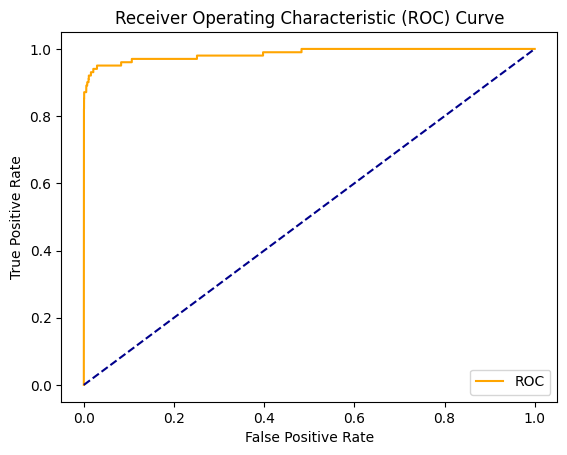

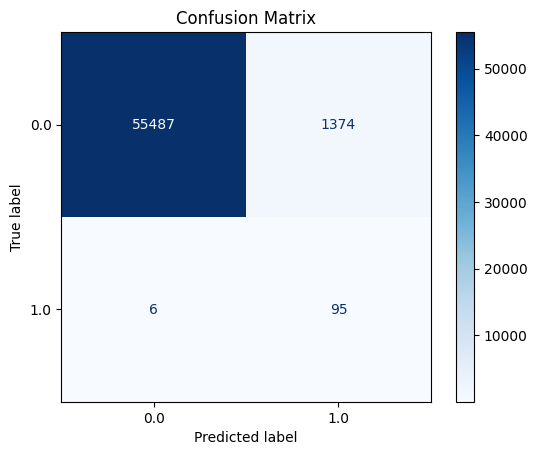

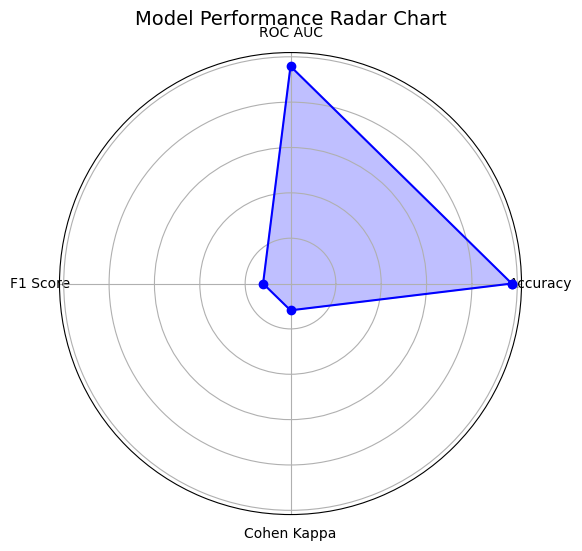

In [53]:
accuracy_lrsmt, roc_auc_lrsmt, f1_score_lrsmt, coh_kap_lrsmt, tt_lrsmt = (
    logistic_regression(x_train_smt, y_train_smt, x_test, y_test)
)
plot_spider_chart(
    [accuracy_lrsmt, roc_auc_lrsmt, f1_score_lrsmt, coh_kap_lrsmt],
)

Accuracy = 0.9936624416277519
ROC Area under Curve = 0.9029332603860621
Precision  = 0.19339622641509435
Recall  = 0.8118811881188119
F1 Score  = 0.31238095238095237
Cohen's Kappa = 0.31040595649771907
Time taken = 5.252840280532837
              precision    recall  f1-score   support

         0.0    0.99966   0.99399   0.99682     56861
         1.0    0.19340   0.81188   0.31238       101

    accuracy                        0.99366     56962
   macro avg    0.59653   0.90293   0.65460     56962
weighted avg    0.99823   0.99366   0.99560     56962



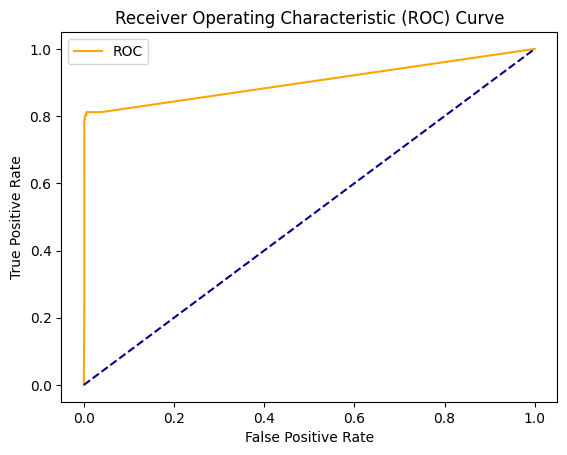

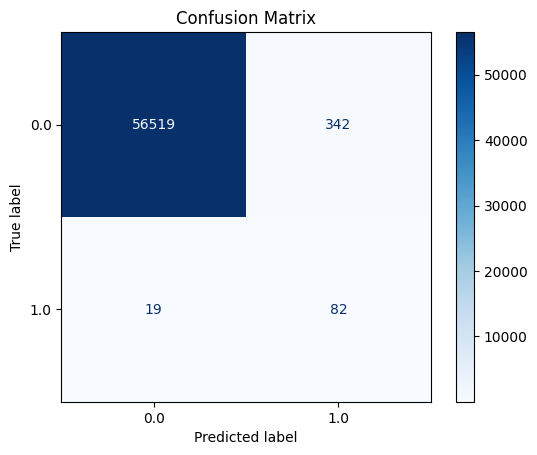

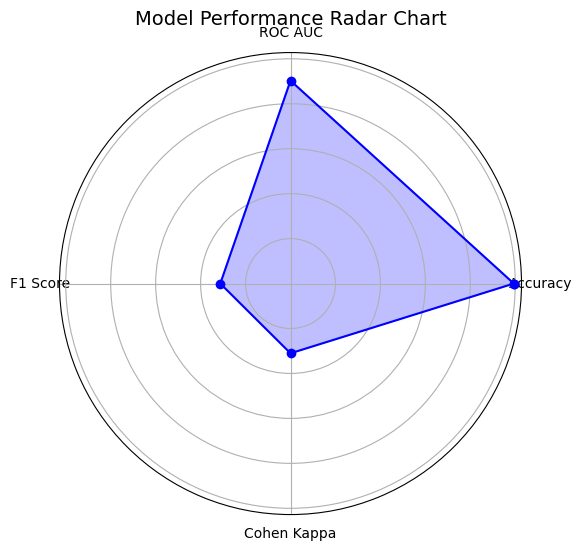

In [54]:
accuracy_dtsmt, roc_auc_dtsmt, f1_score_dtsmt, coh_kap_dtsmt, tt_dtsmt = decision_tree(
    x_train_smt, y_train_smt, x_test, y_test
)
plot_spider_chart([accuracy_dtsmt, roc_auc_dtsmt, f1_score_dtsmt, coh_kap_dtsmt])

Accuracy = 0.9994908886626171
ROC Area under Curve = 0.9206777653548405
Precision  = 0.8673469387755102
Recall  = 0.8415841584158416
F1 Score  = 0.8542713567839196
Cohen's Kappa = 0.8540164137394944
Time taken = 416.01411294937134
              precision    recall  f1-score   support

         0.0    0.99972   0.99977   0.99974     56861
         1.0    0.86735   0.84158   0.85427       101

    accuracy                        0.99949     56962
   macro avg    0.93353   0.92068   0.92701     56962
weighted avg    0.99948   0.99949   0.99949     56962



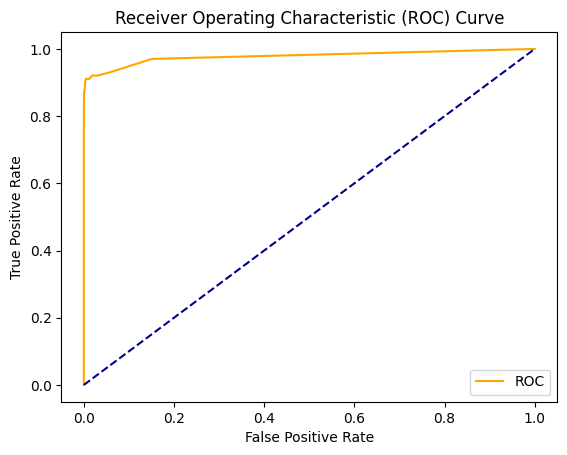

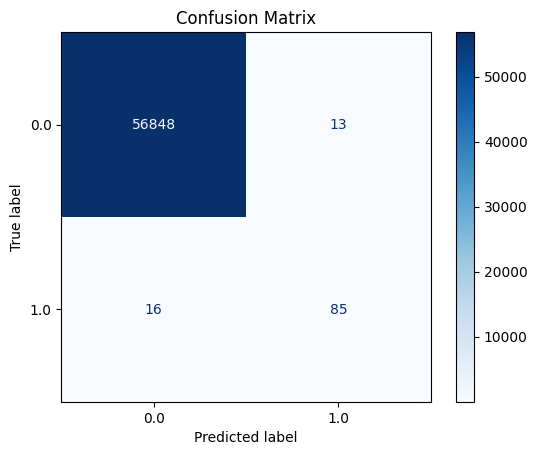

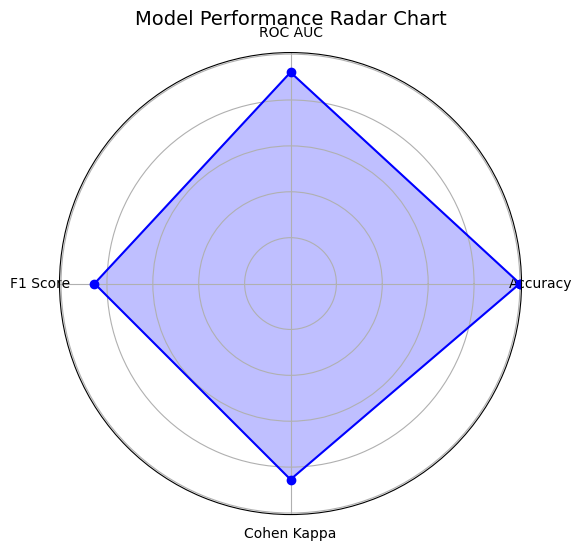

In [55]:
accuracy_rfsmt, roc_auc_rfsmt, f1_score_rfsmt, coh_kap_rfsmt, tt_rfsmt = random_forest(
    x_train_smt, y_train_smt, x_test, y_test
)
plot_spider_chart([accuracy_rfsmt, roc_auc_rfsmt, f1_score_rfsmt, coh_kap_rfsmt])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227454, number of negative: 227454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.125835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454908, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy = 0.9987886661282961
ROC Area under Curve = 0.9252677320984767
Precision  = 0.6142857142857143
Recall  = 0.8514851485148515
F1 Score  = 0.7136929460580913
Cohen's Kappa = 0.7131019225286181
Time taken = 11.051954507827759
              precision    recall  f1-score   support

         0.0    0.99974   0.99905   0.99939     56861
         1.0    0.61429   0.85149   0.71369       101

    accuracy                        0.99879     56962
   macro avg    0.80701   0.92527   0.85654     56962
weighted avg    0.99905   0.99879   0.99889     56962



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


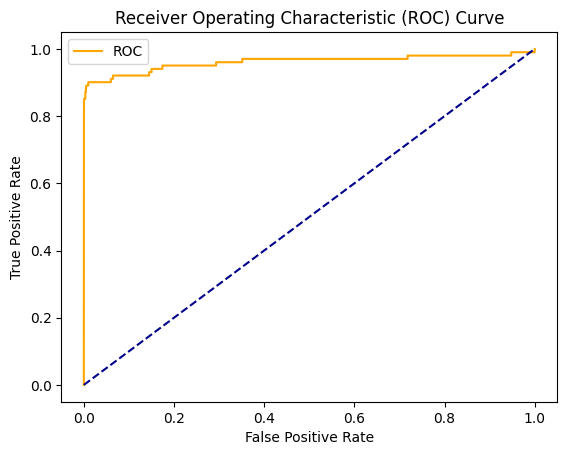

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


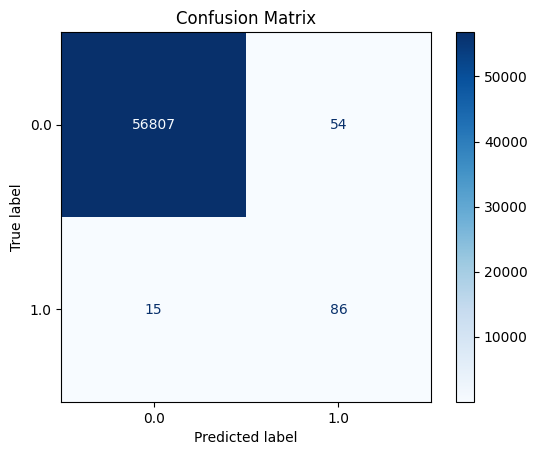

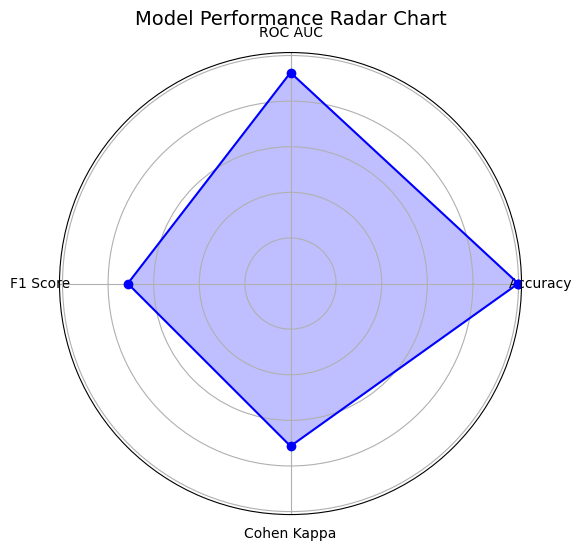

In [56]:
accuracy_lgbsmt, roc_auc_lgbsmt, f1_score_lgbsmt, coh_kap_lgbsmt, tt_lgbsmt = lightGBM(
    x_train_smt, y_train_smt, x_test, y_test
)
plot_spider_chart([accuracy_lgbsmt, roc_auc_lgbsmt, f1_score_lgbsmt, coh_kap_lgbsmt])

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Accuracy = 0.9757382114392051
ROC Area under Curve = 0.9433722429945111
Precision  = 0.06279863481228669
Recall  = 0.9108910891089109
F1 Score  = 0.11749680715197956
Cohen's Kappa = 0.11455935052353061
Time taken = 317.4006245136261
              precision    recall  f1-score   support

         0.0    0.99984   0.97585   0.98770     56861
         1.0    0.06280   0.91089   0.11750       101

    accuracy                        0.97574     56962
   macro avg    0.53132   0.94337   0.55260     56962
weighted avg    0.99818   0.97574   0.98616     56962



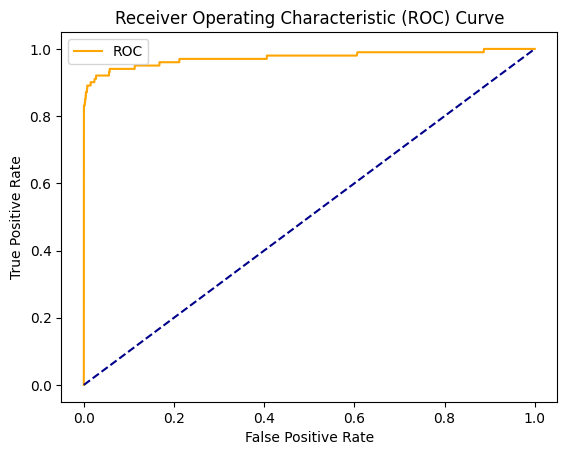

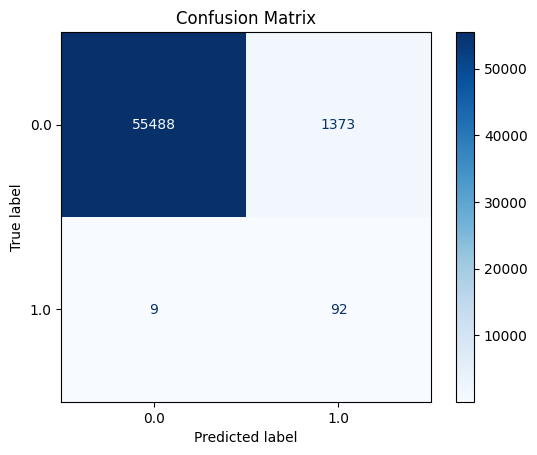

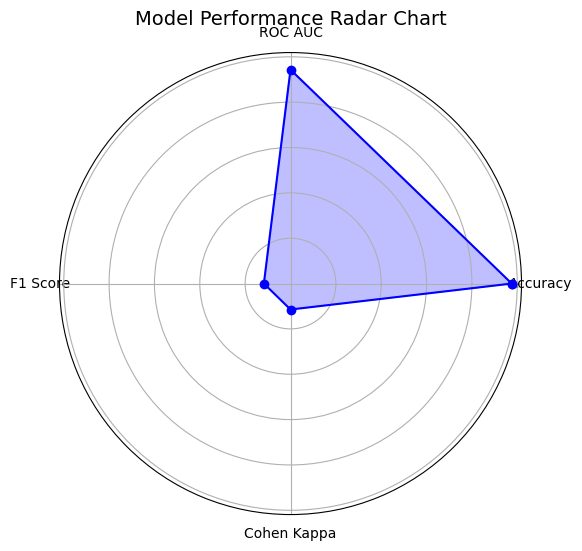

In [57]:
accuracy_adasmt, roc_auc_adasmt, f1_score_adasmt, coh_kap_adasmt, tt_adasmt = adaboost(
    x_train_smt, y_train_smt, x_test, y_test
)
plot_spider_chart([accuracy_adasmt, roc_auc_adasmt, f1_score_adasmt, coh_kap_adasmt])

Learning rate set to 0.5
0:	learn: 0.0938983	total: 7.98s	remaining: 2m 31s
1:	learn: 0.0369055	total: 15.7s	remaining: 2m 20s
2:	learn: 0.0199682	total: 21.8s	remaining: 2m 3s
3:	learn: 0.0125474	total: 29.4s	remaining: 1m 57s
4:	learn: 0.0086884	total: 35.7s	remaining: 1m 47s
5:	learn: 0.0059906	total: 43.2s	remaining: 1m 40s
6:	learn: 0.0042264	total: 49.6s	remaining: 1m 32s
7:	learn: 0.0034404	total: 56.9s	remaining: 1m 25s
8:	learn: 0.0028327	total: 1m 3s	remaining: 1m 17s
9:	learn: 0.0023884	total: 1m 10s	remaining: 1m 10s
10:	learn: 0.0021406	total: 1m 16s	remaining: 1m 2s
11:	learn: 0.0018043	total: 1m 24s	remaining: 56.1s
12:	learn: 0.0015753	total: 1m 30s	remaining: 48.7s
13:	learn: 0.0012858	total: 1m 37s	remaining: 42s
14:	learn: 0.0011692	total: 1m 44s	remaining: 34.7s
15:	learn: 0.0010273	total: 1m 51s	remaining: 27.9s
16:	learn: 0.0009326	total: 1m 57s	remaining: 20.8s
17:	learn: 0.0008498	total: 2m 4s	remaining: 13.9s
18:	learn: 0.0007541	total: 2m 11s	remaining: 6.9s
1

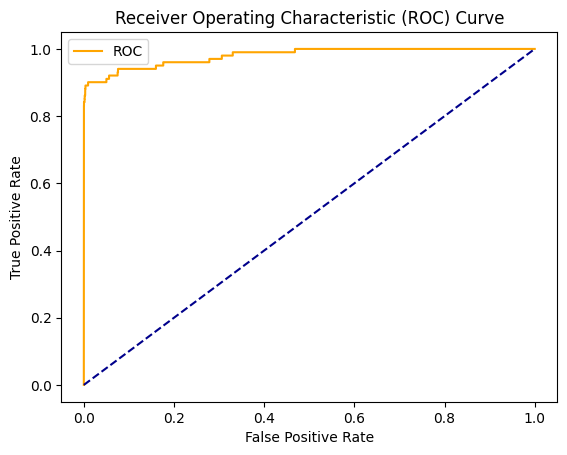

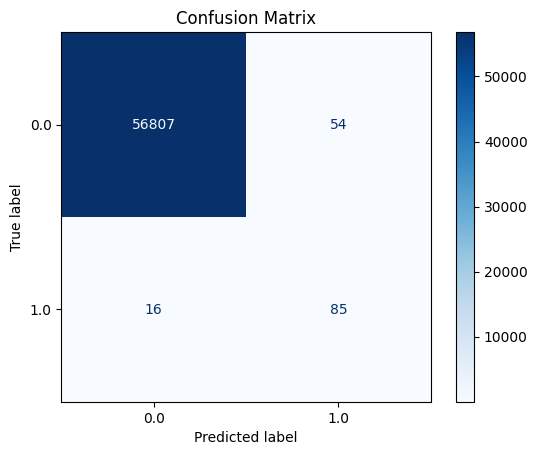

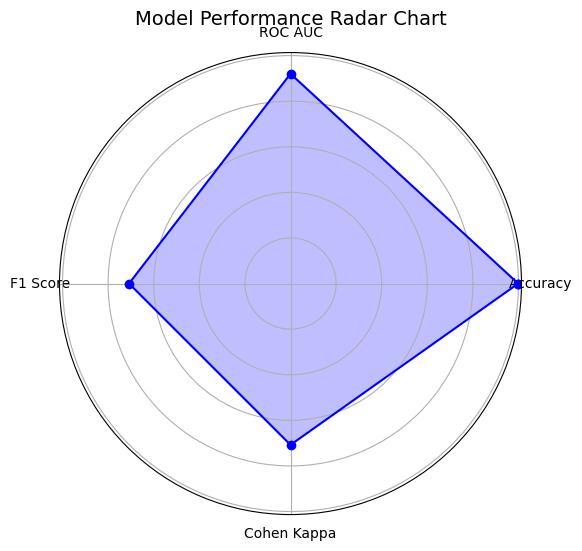

In [58]:
accuracy_cbsmt, roc_auc_cbsmt, f1_score_cbsmt, coh_kap_cbsmt, tt_cbsmt = catboost(
    x_train_smt, y_train_smt, x_test, y_test
)
plot_spider_chart(
    [accuracy_cbsmt, roc_auc_cbsmt, f1_score_cbsmt, coh_kap_cbsmt],
)

Accuracy = 0.9991924440855307
ROC Area under Curve = 0.9254699796846957
Precision  = 0.7350427350427351
Recall  = 0.8514851485148515
F1 Score  = 0.7889908256880734
Cohen's Kappa = 0.7885884569748691
Time taken = 4.9467387199401855
              precision    recall  f1-score   support

         0.0    0.99974   0.99945   0.99960     56861
         1.0    0.73504   0.85149   0.78899       101

    accuracy                        0.99919     56962
   macro avg    0.86739   0.92547   0.89429     56962
weighted avg    0.99927   0.99919   0.99922     56962



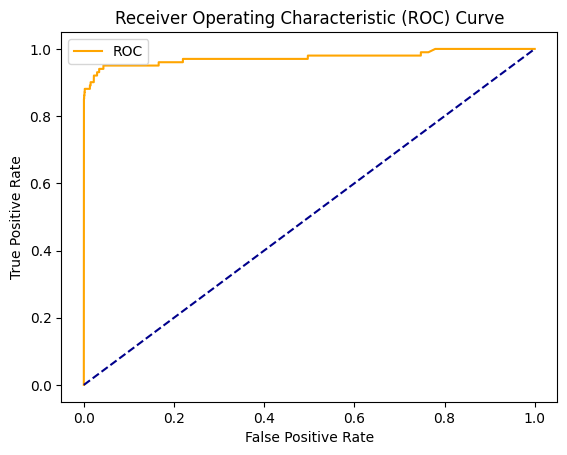

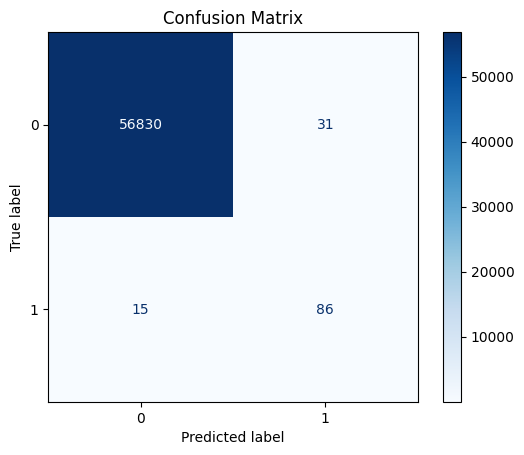

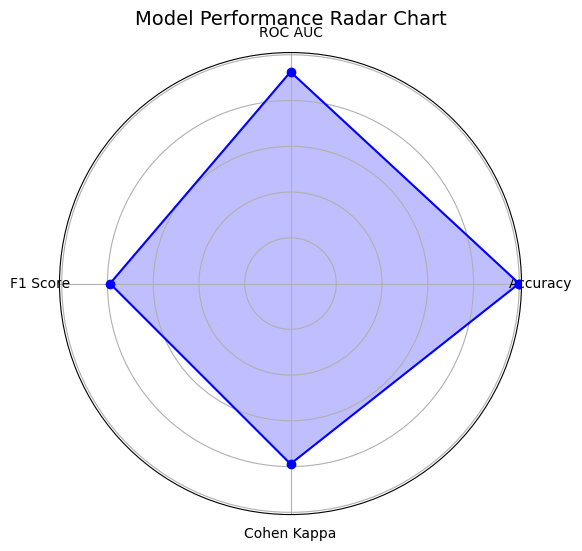

In [59]:
accuracy_xgbsmt, roc_auc_xgbsmt, f1_score_xgbsmt, coh_kap_xgbsmt, tt_xgbsmt = xgboost(
    x_train_smt, y_train_smt, x_test, y_test
)
plot_spider_chart(
    [accuracy_xgbsmt, roc_auc_xgbsmt, f1_score_xgbsmt, coh_kap_xgbsmt],
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number

epoch 0  | loss: 0.26763 | train_f1_score: 0.76046 | valid_f1_score: 0.00552 |  0:00:14s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 10 | loss: 0.00986 | train_f1_score: 0.9975  | valid_f1_score: 0.43367 |  0:02:03s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 20 | loss: 0.00541 | train_f1_score: 0.99879 | valid_f1_score: 0.56311 |  0:03:54s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 30 | loss: 0.00394 | train_f1_score: 0.99873 | valid_f1_score: 0.60068 |  0:05:44s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 40 | loss: 0.00144 | train_f1_score: 0.9998  | valid_f1_score: 0.76923 |  0:07:35s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 50 | loss: 0.00467 | train_f1_score: 0.99926 | valid_f1_score: 0.62774 |  0:09:25s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 60 | loss: 0.0025  | train_f1_score: 0.99959 | valid_f1_score: 0.68595 |  0:11:16s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 70 | loss: 0.0015  | train_f1_score: 0.99971 | valid_f1_score: 0.71489 |  0:13:07s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 80 | loss: 0.00136 | train_f1_score: 0.99982 | valid_f1_score: 0.75113 |  0:14:57s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 90 | loss: 0.0008  | train_f1_score: 0.99989 | valid_f1_score: 0.79621 |  0:16:47s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 100| loss: 0.00091 | train_f1_score: 0.99985 | valid_f1_score: 0.76577 |  0:18:37s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 110| loss: 0.00109 | train_f1_score: 0.99992 | valid_f1_score: 0.78873 |  0:20:28s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 120| loss: 0.00321 | train_f1_score: 0.99952 | valid_f1_score: 0.65385 |  0:22:19s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 130| loss: 0.00073 | train_f1_score: 0.9999  | valid_f1_score: 0.76364 |  0:24:10s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 140| loss: 0.00114 | train_f1_score: 0.99987 | valid_f1_score: 0.77419 |  0:26:00s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 150| loss: 0.00076 | train_f1_score: 0.99992 | valid_f1_score: 0.79426 |  0:27:52s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 160| loss: 0.00058 | train_f1_score: 0.99987 | valid_f1_score: 0.76147 |  0:29:44s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 170| loss: 0.00035 | train_f1_score: 0.99996 | valid_f1_score: 0.78049 |  0:31:35s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: T

epoch 180| loss: 0.00034 | train_f1_score: 0.99997 | valid_f1_score: 0.82    |  0:33:28s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(



Early stopping occurred at epoch 181 with best_epoch = 131 and best_valid_f1_score = 0.83495


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


Accuracy = 0.999403110845827
ROC Area under Curve = 0.9255755001644622
F1 Score  = 0.8349514563106796
Cohen's Kappa = 0.8346525840346788
Time taken = 2033.7065699100494
              precision    recall  f1-score   support

         0.0    0.99974   0.99967   0.99970     56861
         1.0    0.81905   0.85149   0.83495       101

    accuracy                        0.99940     56962
   macro avg    0.90939   0.92558   0.91733     56962
weighted avg    0.99942   0.99940   0.99941     56962



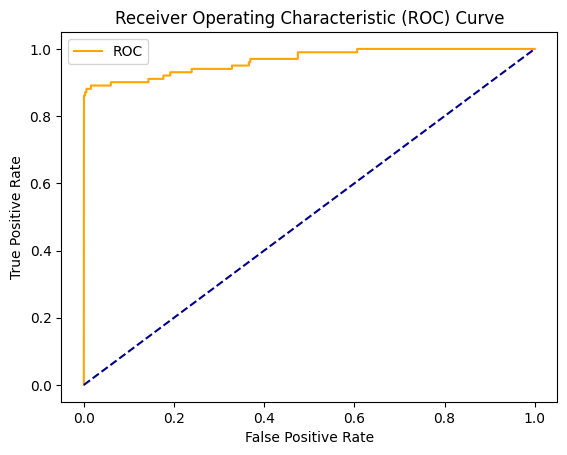

Confusion matrix, without normalization


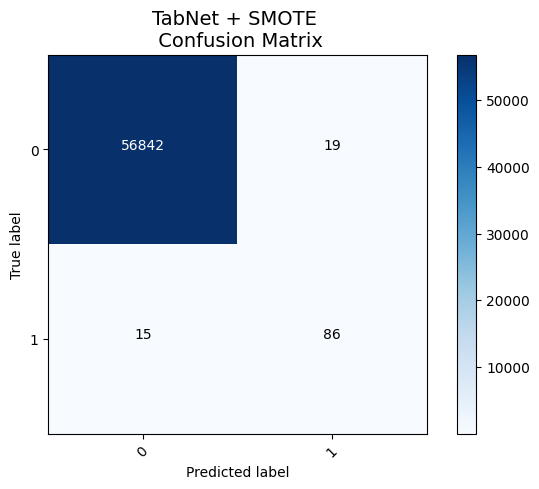

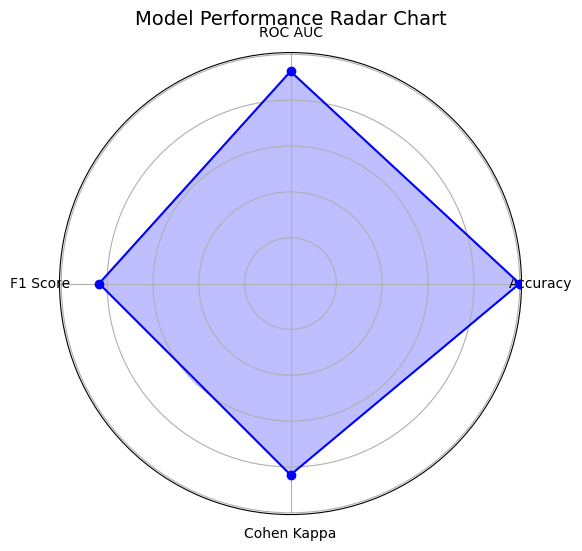

In [60]:
(
    accuracy_tabnetsmt,
    roc_auc_tabnetsmt,
    f1_score_tabnetsmt,
    coh_kap_tabnetsmt,
    tt_tabnetsmt,
) = tabnet(x_train_smt, y_train_smt, x_test, y_test)
plot_spider_chart(
    [accuracy_tabnetsmt, roc_auc_tabnetsmt, f1_score_tabnetsmt, coh_kap_tabnetsmt],
)

In [61]:
accuracy_scores = [
    accuracy_lrsmt,
    accuracy_dtsmt,
    accuracy_rfsmt,
    accuracy_lgbsmt,
    accuracy_cbsmt,
    accuracy_xgbsmt,
    accuracy_adasmt,
    accuracy_tabnetsmt,
]
roc_auc_scores = [
    roc_auc_lrsmt,
    roc_auc_dtsmt,
    roc_auc_rfsmt,
    roc_auc_lgbsmt,
    roc_auc_cbsmt,
    roc_auc_xgbsmt,
    roc_auc_adasmt,
    roc_auc_tabnetsmt,
]
f1_scores = [
    f1_score_lrsmt,
    f1_score_dtsmt,
    f1_score_rfsmt,
    f1_score_lgbsmt,
    f1_score_cbsmt,
    f1_score_xgbsmt,
    f1_score_adasmt,
    f1_score_tabnetsmt,
]
coh_kap_scores = [
    coh_kap_lrsmt,
    coh_kap_dtsmt,
    coh_kap_rfsmt,
    coh_kap_lgbsmt,
    coh_kap_cbsmt,
    coh_kap_xgbsmt,
    coh_kap_adasmt,
    coh_kap_tabnetsmt,
]
tt = [
    tt_lrsmt,
    tt_dtsmt,
    tt_rfsmt,
    tt_lgbsmt,
    tt_cbsmt,
    tt_xgbsmt,
    tt_adasmt,
    tt_tabnetsmt,
]

In [62]:
def visualize_model_accuracy_and_time(model_data):
    data = pd.DataFrame(model_data)

    fig, ax1 = plt.subplots(figsize=(12, 10))
    ax1.set_title(
        "Model Comparison: Accuracy and Time taken for execution", fontsize=13
    )
    color = "tab:green"
    ax1.set_xlabel("Model", fontsize=13)
    ax1.set_ylabel("Time taken", fontsize=13, color=color)
    ax2 = sns.barplot(
        x="Model",
        y="Time taken",
        data=data,
        palette="summer",
        hue="Model",
        legend=False,
    )
    ax1.tick_params(axis="y")
    ax2 = ax1.twinx()
    color = "tab:red"
    ax2.set_ylabel("F1 Score", fontsize=13, color=color)
    ax2 = sns.lineplot(x="Model", y="F1 Score", data=data, sort=False, color=color)
    ax2.tick_params(axis="y", color=color)
    plt.show()

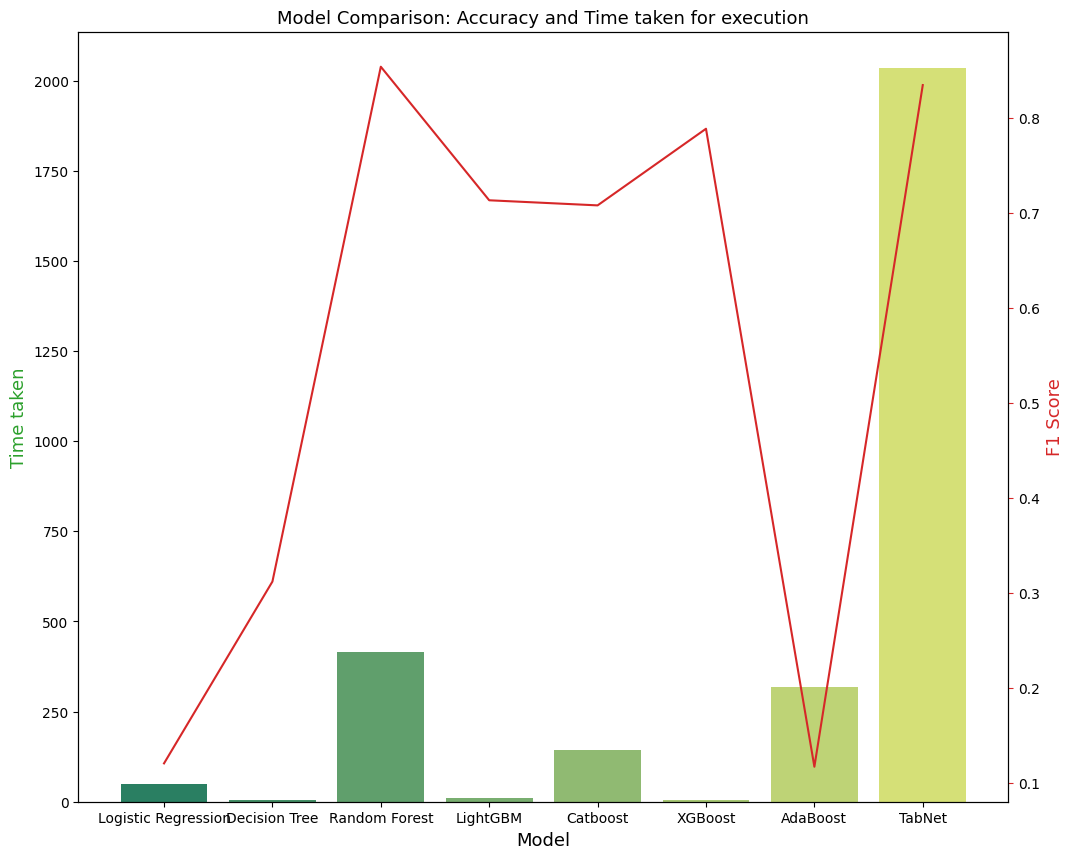

In [63]:
model_data = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "LightGBM",
        "Catboost",
        "XGBoost",
        "AdaBoost",
        "TabNet",
    ],
    "Accuracy": accuracy_scores,
    "ROC_AUC": roc_auc_scores,
    "F1 Score": f1_scores,
    "Cohen_Kappa": coh_kap_scores,
    "Time taken": tt,
}
visualize_model_accuracy_and_time(model_data)

# train

In [64]:
from sklearn.metrics import (
    make_scorer,
    precision_recall_curve,
)
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [65]:
def objective(trial, x_train_smt, y_train_smt):
    max_depth = trial.suggest_int("max_depth", 2, 14)
    param_grid = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        # "n_estimators": trial.suggest_categorical("n_estimators", 1,300 ),
        "learning_rate": trial.suggest_float("learning_rate", 0.0001, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 4, 2**max_depth),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 5, 500),
        "max_bin": trial.suggest_int("max_bin", 10, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
        "verbose": -1,
    }
    # scoring = {'accuracy' : make_scorer(accuracy_score),
    #      'precision' : make_scorer(precision_score),
    #     'recall' : make_scorer(recall_score),
    #    'f1_score' : make_scorer(f1_score)}

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = xgb.XGBClassifier(**param_grid)
    model.fit(x_train_smt, y_train_smt)
    scores = cross_val_score(
        model,
        x_train_smt,
        y_train_smt,
        scoring=make_scorer(f1_score, average="weighted", labels=[1]),
        cv=cv,
        n_jobs=-1,
    )
    return np.mean(scores)

In [66]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 19.6 MB/s eta 0:00:00


In [67]:
import optuna

[I 2025-05-17 19:47:21,483] A new study created in memory with name: no-name-ced65b9b-11d1-4b99-a813-9a89499bdb5e
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "lambda_l1", "lambda_l2", "min_data_in_leaf", "min_gain_to_split", "num_leaves", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-05-17 19:48:32,458] Trial 0 finished with value: 0.9981141709271336 and parameters: {'max_depth': 11, 'learning_rate': 0.09525266164337554, 'num_leaves': 1196, 'min_data_in_leaf': 229, 'max_bin': 38, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 13.358375368667517, 'bagging_fraction': 0.30000000

	Best value (Accuracy): 0.99980
	Best params:
		max_depth: 9
		learning_rate: 0.292057594867254
		num_leaves: 133
		min_data_in_leaf: 326
		max_bin: 299
		lambda_l1: 60
		lambda_l2: 65
		min_gain_to_split: 10.258428491569585
		bagging_fraction: 0.4
		bagging_freq: 1
		feature_fraction: 0.6000000000000001


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:54:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "lambda_l1", "lambda_l2", "min_data_in_leaf", "min_gain_to_split", "num_leaves", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy = 0.999385555282469
ROC Area under Curve = 0.9255667067911484
Precision  = 0.8113207547169812
Recall  = 0.8514851485148515
F1 Score  = 0.8309178743961353
Cohen's Kappa = 0.8306102726980298
Time taken = 9.412873029708862
              precision    recall  f1-score   support

         0.0    0.99974   0.99965   0.99969     56861
         1.0    0.81132   0.85149   0.83092       101

    accuracy                        0.99939     56962
   macro avg    0.90553   0.92557   0.91531     56962
weighted avg    0.99940   0.99939   0.99939     56962



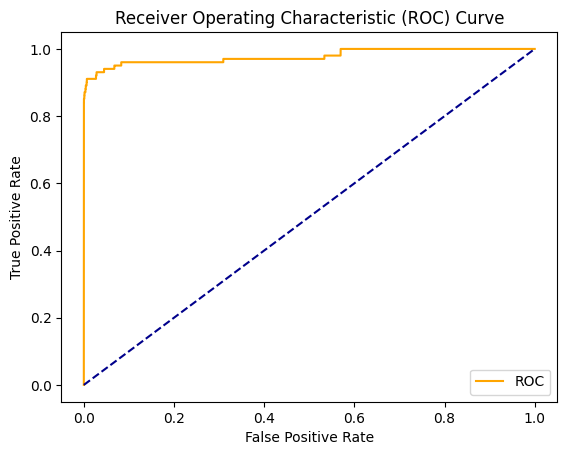

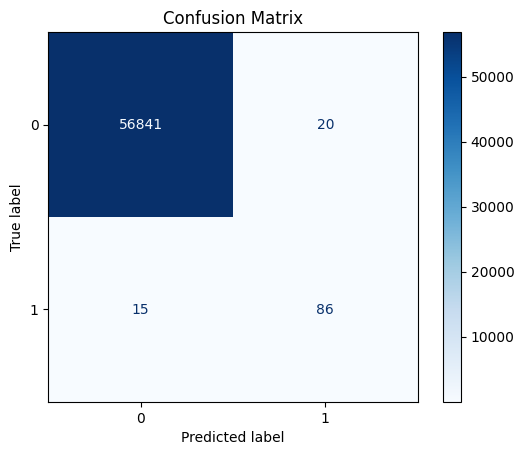

(XGBClassifier(bagging_fraction=0.9, bagging_freq=1, base_score=None,
               booster=None, callbacks=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_fraction=0.2, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, lambda_l1=0, lambda_l2=0,
               learning_rate=0.22690320686746146, max_bin=61,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=13, max_leaves=None,
               min_child_weight=None, min_data_in_leaf=168,
               min_gain_to_split=1.2780588498979437, ...),
 0.999385555282469,
 np.float64(0.9255667067911484),
 0.8309178743961353,
 np.float64(0.8306102726980298),
 9.412873029708862)

In [69]:
study = optuna.create_study(direction="maximize")
func = lambda trial: objective(trial, x_train_smt, y_train_smt)
study.optimize(func, n_trials=100)

print(f"\tBest value (Accuracy): {study.best_value:.5f}")
print("\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

param_grid = {
    "max_depth": 13,
    "learning_rate": 0.22690320686746146,
    "num_leaves": 501,
    "min_data_in_leaf": 168,
    "max_bin": 61,
    "lambda_l1": 0,
    "lambda_l2": 0,
    "min_gain_to_split": 1.2780588498979437,
    "bagging_fraction": 0.9,
    "bagging_freq": 1,
    "feature_fraction": 0.2,
    "verbose": -1,
}

model = xgb.XGBClassifier(**param_grid)
run_model(model, x_train_smt, y_train_smt, x_test, y_test)

In [70]:
import plotly.graph_objs as go
import plotly.subplots as tls
import plotly.io as pio

In [71]:
pio.renderers.default = "colab"

y_test = pd.DataFrame(y_test).to_numpy()
y_pred = model.predict(x_test)
y_score = model.predict_proba(x_test)[:, 1]

In [72]:
# Conf matrix
conf_matrix = confusion_matrix(y_test, y_pred)
trace1 = go.Heatmap(
    z=conf_matrix,
    x=["0 (pred)", "1 (pred)"],
    y=["0 (true)", "1 (true)"],
    xgap=2,
    ygap=2,
    text=conf_matrix,
    colorscale="Viridis",
    showscale=False,
)

In [73]:
# Show metrics
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]
fp = conf_matrix[0, 1]
tn = conf_matrix[0, 0]
Accuracy = (tp + tn) / (tp + tn + fp + fn)
Precision = tp / (tp + fp)
Recall = tp / (tp + fn)
F1_score = 2 * (
    ((tp / (tp + fp)) * (tp / (tp + fn))) / ((tp / (tp + fp)) + (tp / (tp + fn)))
)

show_metrics = pd.DataFrame(data=[[Accuracy, Precision, Recall, F1_score]])
show_metrics = show_metrics.transpose()

colors = ["gold", "lightgreen", "lightcoral", "lightskyblue"]
trace2 = go.Bar(
    x=show_metrics.to_numpy()[0],
    y=["Accuracy", "Precision", "Recall", "F1_score"],
    text=np.round(show_metrics.to_numpy()[0], 4),
    textposition="auto",
    orientation="h",
    opacity=0.8,
    marker=dict(color=colors, line=dict(color="#000000", width=1.5)),
)

In [74]:
# Roc curve
model_roc_auc = round(roc_auc_score(y_test, y_score), 3)
fpr, tpr, t = roc_curve(y_test, y_score)
trace3 = go.Scatter(
    x=fpr,
    y=tpr,
    name="Roc : " + str(model_roc_auc),
    line=dict(color="rgb(22, 96, 167)", width=2),
    fill="tozeroy",
)
trace4 = go.Scatter(x=[0, 1], y=[0, 1], line=dict(color="black", width=1.5, dash="dot"))

In [75]:
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
trace5 = go.Scatter(
    x=recall,
    y=precision,
    name="Precision" + str(precision),
    line=dict(color="lightcoral", width=2),
    fill="tozeroy",
)

In [76]:
# Feature importance
feature_importance = model.get_booster().get_score(importance_type="weight")
coefficients = pd.DataFrame({"coefficients": feature_importance.values()})
column_data = pd.DataFrame({"features": df.drop("amount_log").drop("class").columns})
# Combine and process
coef_sumry = (
    coefficients.hstack(column_data)
    .sort("coefficients", descending=True)
    .filter(pd.col("coefficients") != 0)
)
# Feature coefficients visualization
trace6 = go.Bar(
    x=coef_sumry["features"].to_list(),
    y=coef_sumry["coefficients"].to_list(),
    name="coefficients",
    marker=dict(
        color=coef_sumry["coefficients"].to_list(),
        colorscale="Viridis",
        line=dict(width=0.6, color="black"),
    ),
)

In [77]:
# Cumulative gain

pos = DataFrame(y_test).to_dummies().to_numpy()
pos = pos[:, 1]
npos = np.sum(pos)
index = np.argsort(y_score)
index = index[::-1]
sort_pos = pos[index]
# cumulative sum
cpos = np.cumsum(sort_pos)
# recall
recall = cpos / npos
# size obs test
n = y_test.shape[0]
size = np.arange(start=1, stop=369, step=1)
# proportion
size = size / n
# plots
trace7 = go.Scatter(
    x=size,
    y=recall,
    name="Lift curve",
    line=dict(color="gold", width=2),
    fill="tozeroy",
)

In [78]:
# Subplots
fig = tls.make_subplots(
    rows=4,
    cols=2,
    print_grid=False,
    specs=[[{}, {}], [{}, {}], [{"colspan": 2}, None], [{"colspan": 2}, None]],
    subplot_titles=(
        "Confusion Matrix",
        "Metrics",
        "ROC curve" + " " + "(" + str(model_roc_auc) + ")",
        "Precision - Recall curve",
        "Cumulative gains curve",
        "Feature importance",
    ),
)

fig.add_trace(trace1, 1, 1)
fig.add_trace(trace2, 1, 2)
fig.add_trace(trace3, 2, 1)
fig.add_trace(trace4, 2, 1)
fig.add_trace(trace5, 2, 2)
fig.add_trace(trace6, 4, 1)
fig.add_trace(trace7, 3, 1)

fig["layout"].update(
    showlegend=False,
    title="Model performance report XGBoost after tuning",
    autosize=False,
    height=1500,
    width=830,
    plot_bgcolor="rgba(240,240,240, 0.95)",
    paper_bgcolor="rgba(240,240,240, 0.95)",
    margin=dict(b=195),
)
fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
fig["layout"]["xaxis3"].update(dict(title="false positive rate"))
fig["layout"]["yaxis3"].update(dict(title="true positive rate"))
fig["layout"]["xaxis4"].update(dict(title="recall"), range=[0, 1.05])
fig["layout"]["yaxis4"].update(dict(title="precision"), range=[0, 1.05])
fig["layout"]["xaxis5"].update(dict(title="Percentage contacted"))
fig["layout"]["yaxis5"].update(dict(title="Percentage positive targeted"))
fig.layout.title.font.size = 14

fig.show("colab")